In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("C:\\Users\\ACER\\OneDrive\\project1\\detecting spam email\\dataset\\emails.csv")
df.head()
# hiển thị bộ dữ liệu và các thông tin cơ bản về nó

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# kiểm tra các thông tin về bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [11]:
# Thống kê mô tả
print(df.describe(include="all"))

       Email No.          the           to          ect          and  \
count       5172  5172.000000  5172.000000  5172.000000  5172.000000   
unique      5172          NaN          NaN          NaN          NaN   
top      Email 1          NaN          NaN          NaN          NaN   
freq           1          NaN          NaN          NaN          NaN   
mean         NaN     6.640565     6.188128     5.143852     3.075599   
std          NaN    11.745009     9.534576    14.101142     6.045970   
min          NaN     0.000000     0.000000     1.000000     0.000000   
25%          NaN     0.000000     1.000000     1.000000     0.000000   
50%          NaN     3.000000     3.000000     1.000000     1.000000   
75%          NaN     8.000000     7.000000     4.000000     3.000000   
max          NaN   210.000000   132.000000   344.000000    89.000000   

                for           of            a          you          hou  ...  \
count   5172.000000  5172.000000  5172.000000  5172.000

In [12]:
# Kiểm tra giá trị missing
print(df.isnull().sum())

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [ ]:
X = df.drop(columns=["Prediction", "Email No."])  # dữ liệu đầu vào
y = df["Prediction"]  # nhãn


In [ ]:
# kiểm tra đã drop đúng cột chưa
print(X.columns)

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'enhancements', 'connevey', 'jay', 'valued', 'lay', 'infrastructure',
       'military', 'allowing', 'ff', 'dry'],
      dtype='object', length=3000)


Dữ liệu của ta không có missing data, nên ta không phải xử lý dữ liệu đó. Trong trường hợp có thì ta phải cho dữ liệu đó là 0 hoặc là xóa luôn data đó

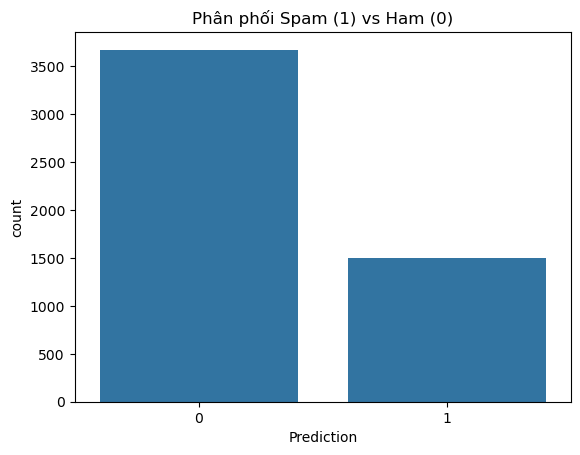

In [ ]:
# kiểm tra sự phân phối của nhãn ( để đảm bảo rằng dữ liệu không bị lệch )
sns.countplot(x="Prediction", data=df)
plt.title("Phân phối Spam (1) vs Ham (0)")
plt.show()

In [ ]:
# chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [25]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB()

In [26]:
y_pred = nb.predict(X_test)


🎯 Accuracy: 0.9420289855072463

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       735
           1       0.87      0.94      0.90       300

    accuracy                           0.94      1035
   macro avg       0.92      0.94      0.93      1035
weighted avg       0.94      0.94      0.94      1035



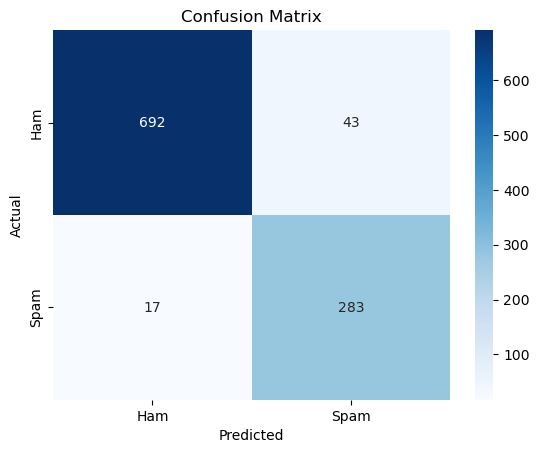

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ham","Spam"], yticklabels=["Ham","Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()